#                                                Assignment -  1  -

Build a classification model to classify the gender of a Hollywood movie character based on their dialogues in the movie. 

# 

In [1]:
 !pip install imblearn

For IMBALANCED Data sets - inorder to Make balanced ones, for undersampling 

In [57]:
import pandas as pd


import statistics
from statistics import median

import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder  



from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier



from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import FeatureUnion, Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin


Libraries utilized for the Development of the problem statement

In [74]:
characters = pd.read_csv(('C:\\Users\\Rajesh Kumar\\Desktop\\whitehat\\movie_characters_metadata.tsv'),sep='\t', header= None,  error_bad_lines=False,
                       warn_bad_lines=False)

conversations = pd.read_csv(('C:\\Users\\Rajesh Kumar\\Desktop\\whitehat\\movie_conversations.tsv'),sep='\t', header= None,  error_bad_lines=False,
                       warn_bad_lines=False)

lines = pd.read_csv(('C:\\Users\\Rajesh Kumar\\Desktop\\whitehat\\movie_lines.tsv'),sep='\t', header= None,  error_bad_lines=False,
                       warn_bad_lines=False)

metadata = pd.read_csv(('C:\\Users\\Rajesh Kumar\\Desktop\\whitehat\\movie_titles_metadata.tsv'),sep='\t', header= None,  error_bad_lines=False,
                       warn_bad_lines=False)

Reading All Dataset from the Local Machine - 

# CHARACTERS Dataset Analysis - Preprocessing 

In [75]:
characters.head()

,0,1,2,3,4,5
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


Characters.head() - Indicates the First Five Samples of the Dataset

In [76]:
characters.columns = ['CharID','CharName','MovieID','MovieName','Gender','PositionCredits']
characters.head()

,CharID,CharName,MovieID,MovieName,Gender,PositionCredits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


Charaters names - Columns Headings addition and also Displaying the Data samples with Head()

In [77]:
characters.shape

(9034, 6)

In [78]:
characters.Gender.value_counts()

?    6008
m    1899
f     921
M     145
F      44
Name: Gender, dtype: int64

# Gender Count - All categories

In [79]:
characters = characters[characters.Gender != '?']

In [80]:
characters.Gender.value_counts()

m    1899
f     921
M     145
F      44
Name: Gender, dtype: int64

In [81]:
characters['Gender'] = characters['Gender'].replace('m','M', regex=True)
characters['Gender'] = characters['Gender'].replace('f','F', regex=True)

Changing Gender labels small letters to capital letters - Inorder to maintain linearity

In [82]:
characters.Gender.value_counts()

M    2044
F     965
Name: Gender, dtype: int64

Total Male = 2044 , Female = 956

In [83]:
characters.Gender = characters.Gender.apply(lambda k: 0 if k in ['M'] else 1)  
characters.shape

(3026, 6)

In [84]:
characters.Gender.value_counts()

0    2044
1     982
Name: Gender, dtype: int64

In [15]:
characters.CharName.value_counts()

JACK             17
JOHN             13
DAVID            13
MICHAEL          13
MAX              13
                 ..
GRIMSRUD          1
AARON             1
DICK VAN DYKE     1
UNCLE VICTOR      1
VAUGHAN           1
Name: CharName, Length: 1949, dtype: int64

Character names Displayed

In [16]:
characters.MovieName.value_counts()

magnolia                          18
lone star                         16
nixon                             12
the anniversary party             12
grand hotel                       12
                                  ..
predator                           1
red white black & blue             1
la battaglia di algeri             1
the nightmare before christmas     1
salt of the earth                  1
Name: MovieName, Length: 599, dtype: int64

Movies Names Displayed

In [17]:
characters.PositionCredits.value_counts()

1       497
2       443
3       352
?       330
4       268
5       211
6       169
7       125
8       100
9        79
10       54
11       40
1000     38
13       33
12       32
16       26
18       24
14       24
17       19
19       18
15       14
21       13
22        9
20        8
29        7
27        6
24        5
26        5
25        5
31        4
35        4
23        4
45        4
38        3
43        3
34        3
33        3
30        2
59        2
42        2
28        2
36        2
39        2
32        2
47        1
44        1
51        1
63        1
71        1
82        1
41        1
46        1
70        1
37        1
50        1
62        1
49        1
Name: PositionCredits, dtype: int64

Position Credits Displayed 

In [18]:
characters.PositionCredits = characters.PositionCredits.apply(lambda l: '10+' if not l in ['1', '2', '3', '4', '5', '6', '7', '8', '9'] else l)  
characters.PositionCredits.value_counts()

10+    782
1      497
2      443
3      352
4      268
5      211
6      169
7      125
8      100
9       79
Name: PositionCredits, dtype: int64

Position Credits values are in improper state, unbalanced. Changing the values - 0 to 9 and rest of the elements as 10+

# LINES Dataset Analysis - Preprocessing

In [86]:
lines.shape

(293202, 5)

In [20]:
lines.columns = ['LineID','CharID','MovieID','CharName','Dialogue']
lines.head()

,LineID,CharID,MovieID,CharName,Dialogue
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


In [21]:
Data1 = pd.merge(lines, characters, how='inner', on=['CharID','MovieID', 'CharName'])

Data1.head()

,LineID,CharID,MovieID,CharName,Dialogue,MovieName,Gender,PositionCredits
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4


Adding labels to the dataset as columns Header and Merging Lines and Characters Datasets

In [22]:
Data1.shape

(229309, 8)

In [23]:
Data1 = Data1[Data1['Dialogue'].notnull()]
Data1.shape

(229106, 8)

# METADATA Dataset Analysis - Preprocessing

In [24]:
metadata.shape

(617, 6)

In [25]:
metadata.head()

,0,1,2,3,4,5
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [26]:
metadata.columns = ['MovieID','MovieName','ReleaseYear','Rating','Votes','Genres']

In [27]:
metadata.head()

,MovieID,MovieName,ReleaseYear,Rating,Votes,Genres
0,m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
2,m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
3,m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
4,m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


Columns Header added, and Displayed

In [28]:
metadata.shape

(617, 6)

In [29]:
Datameta = pd.merge(Data1, metadata, how='inner')

In [30]:
Datameta.head()

,LineID,CharID,MovieID,CharName,Dialogue,MovieName,Gender,PositionCredits,ReleaseYear,Rating,Votes,Genres
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance']
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance']
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance']
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance']
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance']


Merged Metadata with Data1 File(Lines, Characters)

# Finding the Dailogues length and Dailogues Word Count Values

In [31]:
Datameta['Dailogue_Length'] = Datameta.Dialogue.str.len()            
Datameta['Dailogue_Word_Count'] = Datameta.Dialogue.str.count(' ') + 1 
Datameta.head()

,LineID,CharID,MovieID,CharName,Dialogue,MovieName,Gender,PositionCredits,ReleaseYear,Rating,Votes,Genres,Dailogue_Length,Dailogue_Word_Count
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],12,3
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],10,3
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],9,2
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],46,10
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],32,6


In [32]:
max(Datameta.Dailogue_Length), min(Datameta.Dailogue_Length)

(2714, 1)

In [33]:
max(Datameta.Dailogue_Word_Count), min(Datameta.Dailogue_Word_Count)

(485, 1)

In [34]:
Datameta.Dailogue_Length_Median = median(Datameta.Dailogue_Length)
Datameta.Dailogue_Word_Count_Median = median(Datameta.Dailogue_Word_Count)

In [35]:
Datameta.head()

,LineID,CharID,MovieID,CharName,Dialogue,MovieName,Gender,PositionCredits,ReleaseYear,Rating,Votes,Genres,Dailogue_Length,Dailogue_Word_Count
0,L1045,u0,m0,BIANCA,They do not!,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],12,3
1,L985,u0,m0,BIANCA,I hope so.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],10,3
2,L925,u0,m0,BIANCA,Let's go.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],9,2
3,L872,u0,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],46,10
4,L869,u0,m0,BIANCA,Like my fear of wearing pastels?,10 things i hate about you,1,4,1999,6.9,62847.0,['comedy' 'romance'],32,6


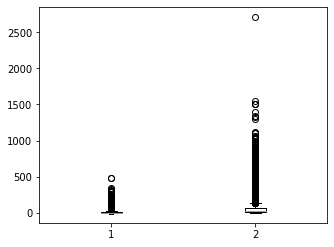

In [87]:
fig = plt.figure(figsize =(4, 3))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([ Datameta.Dailogue_Word_Count, Datameta.Dailogue_Length ])
plt.show()

In [37]:
train = Datameta.groupby(['CharID', 'MovieID', 'CharName', 'Gender', 'PositionCredits','ReleaseYear']). \
            agg({'Dailogue_Length' : ['median'], 
                 'Dailogue_Word_Count' : ['median'],
                 'CharID' : ['count'],
                 'Dialogue' : [lambda x : ' '.join(x)]
                })

## Renaming columns by aggregate functions
train.columns = ["_".join(x) for x in train.columns.ravel()]

train.reset_index(inplace=True)
train

C:\Users\Rajesh Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  if __name__ == '__main__':


,CharID,MovieID,CharName,Gender,PositionCredits,ReleaseYear,Dailogue_Length_median,Dailogue_Word_Count_median,CharID_count,Dialogue_<lambda>
0,u0,m0,BIANCA,1,4,1999,34.0,7.0,94,They do not! I hope so. Let's go. Okay -- you'...
1,u100,m6,AMY,1,7,1999,23.0,4.0,31,She died in her sleep three days ago. It was ...
2,u1003,m65,RICHARD,0,3,1996,24.5,5.0,70,You asked me if I would -- What you said to me...
3,u1005,m65,SETH,0,2,1996,37.0,8.0,163,So let's do it. So do I just follow you? I sai...
4,u1008,m66,C.O.,0,10+,1997,48.0,9.0,33,Of course but there's more -- Uh V.I.P. securi...
...,...,...,...,...,...,...,...,...,...,...
2946,u980,m63,VICTOR,0,3,1931,32.0,6.0,126,SHE'LL NEVER BE YOURS! SHE SAID MY NAME! SHE R...
2947,u983,m64,ALICE,1,10+,2009,30.0,6.0,51,Maybe we should wait for Mr. Christy. The kill...
2948,u985,m64,BILL,0,10+,2009,20.0,4.0,39,It's over twenty miles to the crossroads. Stev...
2949,u997,m65,JACOB,0,1,1996,36.0,6.0,90,I meant me my son and my daughter. Oh that's j...


Finding the Dailogue_Length_median  and Dailogue_Word_Count_median using Aggregate Functions
And also finding count of the characterID count and shown in CharID_count

# Data Modeling - Feature Engineering

In [38]:
train.head()

,CharID,MovieID,CharName,Gender,PositionCredits,ReleaseYear,Dailogue_Length_median,Dailogue_Word_Count_median,CharID_count,Dialogue_<lambda>
0,u0,m0,BIANCA,1,4,1999,34.0,7.0,94,They do not! I hope so. Let's go. Okay -- you'...
1,u100,m6,AMY,1,7,1999,23.0,4.0,31,She died in her sleep three days ago. It was ...
2,u1003,m65,RICHARD,0,3,1996,24.5,5.0,70,You asked me if I would -- What you said to me...
3,u1005,m65,SETH,0,2,1996,37.0,8.0,163,So let's do it. So do I just follow you? I sai...
4,u1008,m66,C.O.,0,10+,1997,48.0,9.0,33,Of course but there's more -- Uh V.I.P. securi...


In [39]:
X = train.copy()
y = train['Gender']

Dependent and Independent Attributes Creation

In [40]:
X.drop('Gender', axis=1, inplace=True)
X.head()

,CharID,MovieID,CharName,PositionCredits,ReleaseYear,Dailogue_Length_median,Dailogue_Word_Count_median,CharID_count,Dialogue_<lambda>
0,u0,m0,BIANCA,4,1999,34.0,7.0,94,They do not! I hope so. Let's go. Okay -- you'...
1,u100,m6,AMY,7,1999,23.0,4.0,31,She died in her sleep three days ago. It was ...
2,u1003,m65,RICHARD,3,1996,24.5,5.0,70,You asked me if I would -- What you said to me...
3,u1005,m65,SETH,2,1996,37.0,8.0,163,So let's do it. So do I just follow you? I sai...
4,u1008,m66,C.O.,10+,1997,48.0,9.0,33,Of course but there's more -- Uh V.I.P. securi...


# Unnecessary Attributes Droping from the Dataset - Feature Engineering

In [41]:
X.drop('CharID',   axis=1, inplace=True)
X.drop('MovieID',  axis=1, inplace=True)
X.drop('CharName', axis=1, inplace=True)

In [42]:
X.head()

,PositionCredits,ReleaseYear,Dailogue_Length_median,Dailogue_Word_Count_median,CharID_count,Dialogue_<lambda>
0,4,1999,34.0,7.0,94,They do not! I hope so. Let's go. Okay -- you'...
1,7,1999,23.0,4.0,31,She died in her sleep three days ago. It was ...
2,3,1996,24.5,5.0,70,You asked me if I would -- What you said to me...
3,2,1996,37.0,8.0,163,So let's do it. So do I just follow you? I sai...
4,10+,1997,48.0,9.0,33,Of course but there's more -- Uh V.I.P. securi...


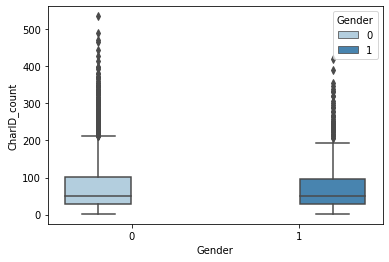

In [88]:
import seaborn as sns
sns.boxplot(data = train, x = 'Gender', y = 'CharID_count', hue = 'Gender', palette="Blues")

Male - Female  Gender based Dailogues Distribution with CharacterID

In [89]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_dt, y_dt = undersample.fit_resample(X, y)
y_dt.value_counts()

0    948
1    948
Name: Gender, dtype: int64

Imbalanced dataset segregatted and splitted as balanced using RandamUnderSampler

# Data Splitting - Machine Learning Model Building

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X_dt, y_dt, test_size=0.2, random_state = 10, stratify=y_dt)

y_val.value_counts()

0    190
1    190
Name: Gender, dtype: int64

In [91]:
class Converter(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self

    def transform(self, data_frame):
        return data_frame.values.ravel()

In order to Change the Numerical, Categorical and Vector wise data , Transformation Class defined

In [94]:
Num_A = ['Dailogue_Length_median', 'Dailogue_Word_Count_median', 'CharID_count']

Num_TF = Pipeline(steps=[('scaler', MinMaxScaler())])

For Numerical Values - Attributes and Tranformation

In [95]:
Cat_A = ['PositionCredits']
Cat_TF = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


For Categorical Values - Attributes and Tranformation

In [96]:
Vec_A = ['Dialogue_<lambda>']
Vec_TF = Pipeline(steps=[
    ('con', Converter()),
    ('tf', TfidfVectorizer())])

For Vectors (Dailogues) - Attributes and Tranformation

In [98]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Num_TF, Num_A),
        ('cat', Cat_TF, Cat_TF),
        ('vec', Vec_TF, Vec_A)
    ])

Preprocessing all the categories and tranformation 

In [103]:
log_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression())])
nb_clf  = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', MultinomialNB())])
rf_clf = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=120, min_samples_leaf=10, 
                                                            max_features=0.7, n_jobs=-1, oob_score=True))])

In [104]:
log_clf.fit(X_train, y_train)
nb_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   MinMaxScaler(copy=True,
                                                                                feature_range=(0,
                                                                                               1)))],
                                                           verbose=False),
                                                  ['Dailogue_Length_median',
                                                   'Dailogue_Word_Count_median',
                               

In [193]:
def results(name: str, model: BaseEstimator) -> None:
    '''
    Custom function to check model performance on validation set
    '''
    preds = model.predict(X_val)

    print(name + " score: %.2f" % model.score(X_val, y_val))
    print(classification_report(y_val, preds))
    labels = ['Male', 'Female']

    conf_matrix = confusion_matrix(y_val, preds)
    plt.figure(figsize= (6,4))
    sns.set(font_scale=1)
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, 
                 center = 0, fmt="d", cmap="coolwarm",linewidths=.02)
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')  

Logistic Regression score: 0.73
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       190
           1       0.74      0.73      0.73       190

    accuracy                           0.73       380
   macro avg       0.73      0.73      0.73       380
weighted avg       0.73      0.73      0.73       380

Naive Bayes score: 0.69
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       190
           1       0.69      0.71      0.70       190

    accuracy                           0.69       380
   macro avg       0.69      0.69      0.69       380
weighted avg       0.69      0.69      0.69       380

Random Forest score: 0.72
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       190
           1       0.70      0.74      0.72       190

    accuracy                           0.72       380
   macro avg       0.72      0.72      0.72   

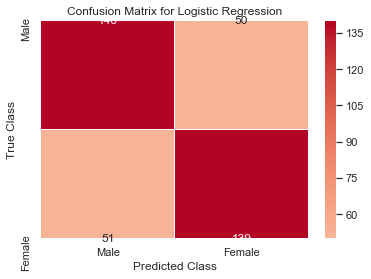

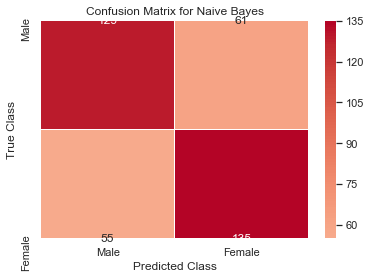

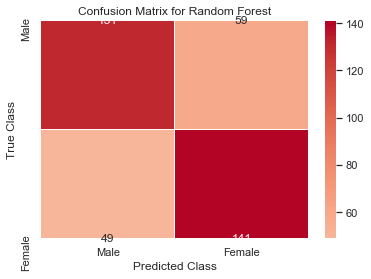

In [194]:
results("Logistic Regression" , log_clf)
results("Naive Bayes" , nb_clf)
results("Random Forest" , rf_clf)